In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive
import os
os.chdir("/gdrive/My Drive/")

Mounted at /gdrive
/gdrive


## GEREKLİ KÜTÜPHANLERİN YÜKLENMESİ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## VERİ SETİNİN OKUNMASI

In [4]:
df = pd.read_csv("adult.csv",names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","Income"])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

## EKSİK VERİLERİN SİLİNMESİ

In [8]:
sutunlar = df.columns
indeks = df.shape[0]

for i in sutunlar:
  eksikVeriSayisi = df[i].isin([" ?"]).sum()
  if eksikVeriSayisi > 0:
    print(i)
    print(eksikVeriSayisi)

workclass
1836
occupation
1843
native-country
583


In [9]:
df = df[df["workclass"] != " ?"]
df = df[df["occupation"] != " ?"]
df = df[df["native-country"] != " ?"]

In [10]:
df.shape

(30162, 15)

## KATEGORİ DEGİSKENLERİN ALINMASI

In [11]:
kategorikiDegiskenler = df.select_dtypes(include=["object"])
kategorikiDegiskenler.columns
kategorikiDegiskenler = kategorikiDegiskenler.columns

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## KATEGORİK DEGİSKENLERİN ENCODE EDİLMESİ (OHE)

In [13]:
sonDF = pd.get_dummies(df)
sonDF

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
sonDFdegiskenler=list(sonDF.columns)
sonDFdegiskenler

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-ma

In [15]:
sonDF

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [16]:
sonDF.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'Income_ <=50K', 'Income_ >50K'],
      dtype='object', length=106)

In [17]:
sonDF = sonDF.drop(["Income_ <=50K","sex_ Female"],axis=1)
sonDF.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native-country_ Puerto-Rico', 'native-country_ Scotland',
       'native-country_ South', 'native-country_ Taiwan',
       'native-country_ Thailand', 'native-country_ Trinadad&Tobago',
       'native-country_ United-States', 'native-country_ Vietnam',
       'native-country_ Yugoslavia', 'Income_ >50K'],
      dtype='object', length=104)

## BAGIMSIZ DEGİŞKENLERİN ÖLÇEKLENDİRİLMESİ

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = sonDF.drop(["Income_ >50K"],axis=1)
surekliDegiskenler = x.columns
surekliDegiskenler
x[surekliDegiskenler] = scaler.fit_transform(x[surekliDegiskenler])
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,-0.179648,-0.271241,-1.682144,-0.192152,-0.300562,4.752103,-0.021549,-0.167171,-0.189727,-0.112505,-0.070933,-0.098186,-0.137166,-0.123759,-0.185944,-0.212827,2.231542,-0.112202,-0.695848,-0.238784,-0.038655,-0.135272,-0.533258,-0.402991,-0.026396,-0.934754,-0.111443,1.449542,-0.179255,-0.167903,2.665687,-0.017277,-0.392705,-0.390565,...,-0.059667,-0.047535,-0.043129,-0.055313,-0.047184,-0.029933,-0.057675,-0.053474,-0.029933,-0.065283,-0.031023,-0.04575,-0.037342,-0.005758,-0.01995,-0.025106,-0.020765,-0.057675,-0.037342,-0.028219,-0.047535,-0.051569,-0.044271,-0.023747,-0.143672,-0.033095,-0.021549,-0.031553,-0.079197,-0.043129,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,-0.179648,-0.271241,-1.682144,-0.192152,3.327105,-0.210433,-0.021549,-0.167171,-0.189727,-0.112505,-0.070933,-0.098186,-0.137166,-0.123759,-0.185944,-0.212827,2.231542,-0.112202,-0.695848,-0.238784,-0.038655,-0.135272,-0.533258,-0.402991,-0.026396,1.069800,-0.111443,-0.689873,-0.179255,-0.167903,-0.375138,-0.017277,-0.392705,2.560393,...,-0.059667,-0.047535,-0.043129,-0.055313,-0.047184,-0.029933,-0.057675,-0.053474,-0.029933,-0.065283,-0.031023,-0.04575,-0.037342,-0.005758,-0.01995,-0.025106,-0.020765,-0.057675,-0.037342,-0.028219,-0.047535,-0.051569,-0.044271,-0.023747,-0.143672,-0.033095,-0.021549,-0.031553,-0.079197,-0.043129,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,-0.179648,-0.271241,0.594479,-0.192152,-0.300562,-0.210433,-0.021549,-0.167171,-0.189727,-0.112505,-0.070933,-0.098186,-0.137166,-0.123759,-0.185944,-0.212827,-0.448121,-0.112202,1.437096,-0.238784,-0.038655,-0.135272,-0.533258,2.481445,-0.026396,-0.934754,-0.111443,-0.689873,-0.179255,-0.167903,-0.375138,-0.017277,-0.392705,-0.390565,...,-0.059667,-0.047535,-0.043129,-0.055313,-0.047184,-0.029933,-0.057675,-0.053474,-0.029933,-0.065283,-0.031023,-0.04575,-0.037342,-0.005758,-0.0

## HEDEF DEGİŞKENİN ALINMASI

In [20]:
y = sonDF["Income_ >50K"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income_ >50K, Length: 30162, dtype: uint8

## VERİ KÜMESİNİN EGİTİM VE TEST KÜMELERİNE AYRILMASI

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state=0)

## MODEL OLUŞTURULMASI

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## TAHMİNLER VE SONUCLARIN DEGERLENDİRİLMESİ

In [23]:
rf_siniflandirici = RandomForestClassifier()
rf_siniflandirici.fit(x_train,y_train)
tahminler = rf_siniflandirici.predict(x_test)
confusion_matrix(y_test,tahminler)

array([[6889,  589],
       [ 956, 1520]])

## DOGRULUK ORANI

In [24]:
accuracy_score(y_test,tahminler)

0.8447860156720917

## MODEL İCİN EN UYGUN PARAMETRELERİN BULUNMASI

In [26]:
rfc_params = {"min_samples_split": [1,3,5],
              "max_depth":[2,4,8],
              "n_estimators": [100,500,1000],
              "max_features": [2,5]
              }
rfc_cv_model = GridSearchCV(rf_siniflandirici,rfc_params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)
print(rfc_cv_model.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.1min finished


{'max_depth': 8, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 500}


## UYGUN PARAMETRELERLE YENİDEN MODEL OLUSTURULMASI, TAHMİN VE SONUCLARIN DEGERLENDİRİLMESİ

In [27]:
rf_siniflandirici2 = RandomForestClassifier(max_depth=8, max_features=5, min_samples_split= 5, n_estimators=500)
rf_siniflandirici2.fit(x_train,y_train)
tahminler2 = rf_siniflandirici2.predict(x_test)
confusion_matrix(y_test,tahminler2)

array([[7234,  244],
       [1435, 1041]])

In [29]:
accuracy_score(y_test,tahminler2)

0.8313240908177617

In [30]:
import matplotlib.pyplot as plt

## EN ONEMLİ 7 DEGİSKENİN BULUNMASI

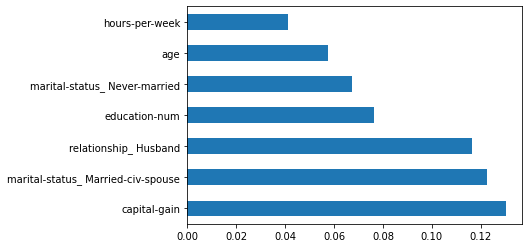

In [43]:
feature = pd.Series(rf_siniflandirici2.feature_importances_, index = x.columns)
feature.nlargest(7).plot(kind = "barh")

## VERİ KÜMESİNİN YENİDEN EGİTİM VE TEST KÜMELERİNE AYRILMASI

In [39]:
enIyiler = feature.nlargest(7)
enIyiler.index
x_train, x_test, y_train, y_test = train_test_split(x[enIyiler.index], y, test_size = 0.33,random_state=0)
x[enIyiler.index]


,capital-gain,marital-status_ Married-civ-spouse,relationship_ Husband,education-num,marital-status_ Never-married,age,hours-per-week
0,0.146092,-0.934754,-0.839145,1.128918,1.449542,0.042796,-0.077734
1,-0.147445,1.069800,1.191689,1.128918,-0.689873,0.880288,-2.331531
2,-0.147445,-0.934754,-0.839145,-0.439738,-0.689873,-0.033340,-0.077734
3,-0.147445,1.069800,1.191689,-1.224066,-0.689873,1.108695,-0.077734
4,-0.147445,1.069800,-0.839145,1.128918,-0.689873,-0.794697,-0.077734
...,...,...,...,...,...,...,...
32556,-0.147445,1.069800,-0.839145,0.736754,-0.689873,-0.870832,-0.244682
32557,-0.147445,1.069800,1.191689,-0.439738,-0.689873,0.118931,-0.077734
32558,-0.147445,-0.934754,-0.839145,-0.439738,-0.689873,1.489374,-0.077734
32559,-0.147445,-0.934754,-0.839145,-0.439738,1.449542,-1.251511,-1.747213


## EN ONEMLİ 7 DEGİSKENİN İLE MODEL OLUŞTURULMASI, TAHMİN VE SONUCLARIN DEGERLENDİRİLMESİ

In [40]:
rf_siniflandirici3 = RandomForestClassifier(max_depth=8, max_features=5, min_samples_split= 5, n_estimators=500)
rf_siniflandirici3.fit(x_train,y_train)
tahminler3 = rf_siniflandirici3.predict(x_test)
confusion_matrix(y_test,tahminler3)

array([[6983,  495],
       [1034, 1442]])

In [42]:
accuracy_score(y_test,tahminler3)

0.8463934096845489